In [1]:
!pip install scikit-plot
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
#import scipy
#scipy.__version__

In [5]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [6]:
from sklearn.datasets import load_iris

frame = load_iris(as_frame=True)
df_orig = frame['data']
X = df_orig.values
y = np.array(frame['target'])

In [7]:
df_orig.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [9]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Partitioning

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
random_state = 0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=random_state
)

In [15]:
# without stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33333333 0.33333333 0.33333333]
[0.37777778 0.3        0.32222222]
[0.26666667 0.38333333 0.35      ]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=random_state
)

In [17]:
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]


In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 4) (60, 4) (90,) (60,)


normalization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [24]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test_norm)
y_test_pred

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1])

In [25]:
# y_test contains the target labels
y_test

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1])

In [26]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.9833333333333333


In [27]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test_norm, y_test)

0.9833333333333333

In [28]:
# KNeighborsClassifier.score is doing this
(y_test_pred == y_test).sum() / len(y_test)

0.9833333333333333

#### Performance evaluation

In [ ]:
# print("F1:", f1_score(y_test, y_test_pred))

In [29]:
print("F1:", f1_score(y_test, y_test_pred, average="macro"))

F1: 0.9833229101521784


In [30]:
print("F1:", f1_score(y_test, y_test_pred, average="micro"))

F1: 0.9833333333333333


In [31]:
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="micro"))

F1: 0.975609756097561


In [33]:
print("F1:", f1_score(y_test, y_test_pred, labels=[1], average="macro"))

F1: 0.975609756097561


In [34]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



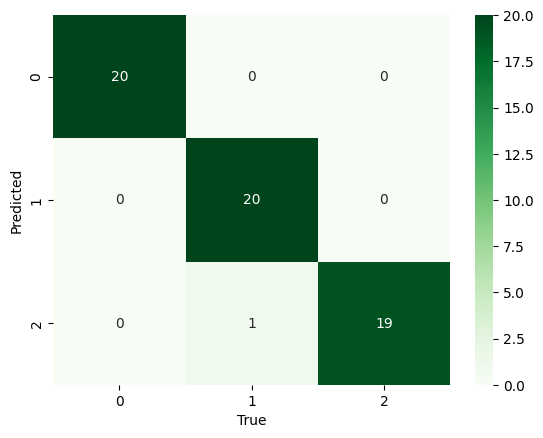

In [35]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [36]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test_norm)
y_test_pred_proba[0:10]

array([[0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ]])

In [37]:
y_test_pred[0:10]

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1])

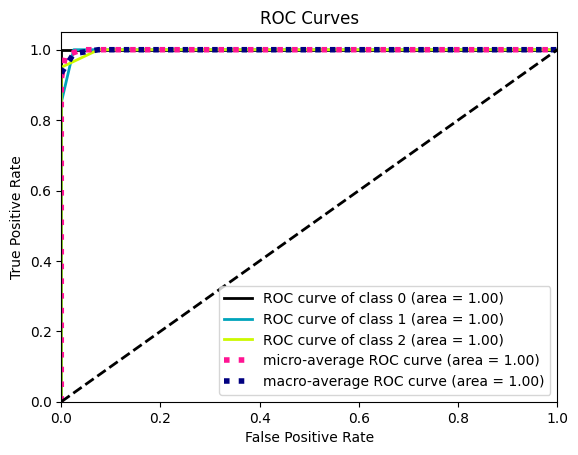

In [38]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, y_test_pred_proba)
plt.show()

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

0.9987499999999999

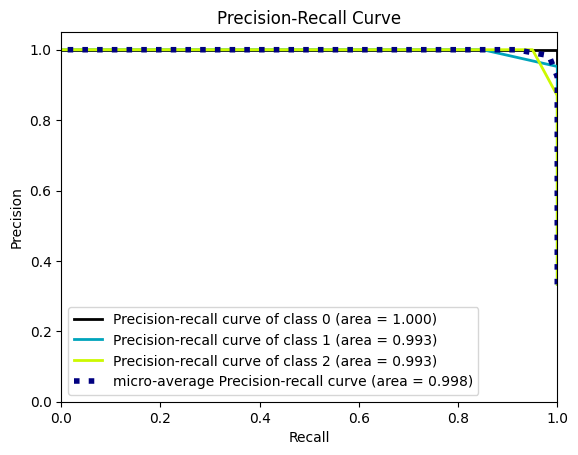

In [40]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

#### Repeated Holdout

In [41]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_test, y_rh_train, y_rh_test = train_test_split(X, y, test_size=0.4, stratify=y)

    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_test_norm = norm.transform(X_rh_test)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_test_norm, y_rh_test)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.050666666666666645


#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [42]:
from sklearn.model_selection import cross_val_score
k = 10

In [43]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.88888889, 1.        , 1.        , 1.        , 0.77777778,
       1.        , 0.55555556, 0.88888889, 1.        , 1.        ])

In [44]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.0888888888888889


In [45]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.9111 (+/- 0.14)


In [46]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.88571429, 1.        , 1.        , 1.        , 0.77777778,
       1.        , 0.55555556, 0.88571429, 1.        , 1.        ])

### Hyperparameters Tuning

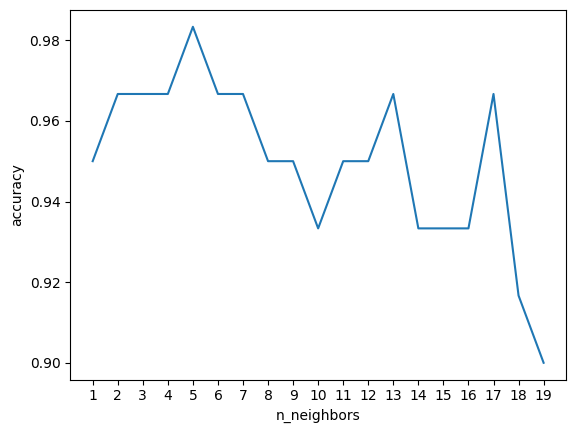

In [47]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_test_norm, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

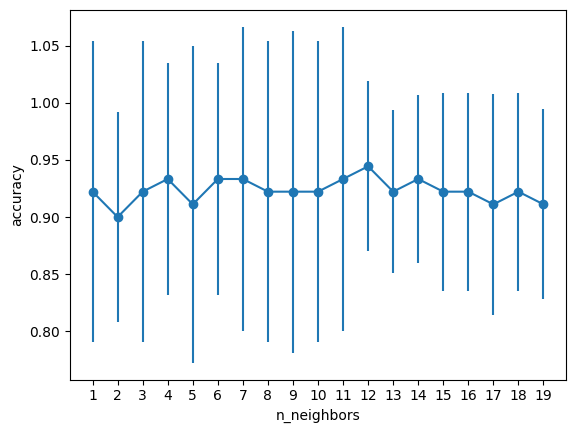

In [48]:
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [49]:
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.95


#### Grid Search

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [68]:
%%time
param_grid = {
    "n_neighbors": (np.arange(1, X_train.shape[0]//2)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

#param_distributions=param_grid,

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

CPU times: user 209 ms, sys: 8.36 ms, total: 218 ms
Wall time: 1.35 s


In [53]:
print(grid.best_params_, grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'distance'} 0.9466666666666665


In [54]:
y_test_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.9666666666666667


In [55]:
clf.score(X_test_norm, y_test)

0.9666666666666667

In [ ]:
# grid.cv_results_

In [56]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001701,0.000688,0.004756,0.000988,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
1,0.001456,0.000712,0.002088,0.000532,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
2,0.001505,0.000594,0.005141,0.001845,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.888889,0.888889,...,0.944444,0.888889,0.888889,0.944444,0.944444,0.833333,0.944444,0.900000,0.056656,140
3,0.001404,0.000728,0.002085,0.000979,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.888889,0.944444,...,0.944444,0.833333,1.000000,0.944444,0.944444,0.833333,0.944444,0.911111,0.060858,113
4,0.001639,0.000918,0.004920,0.001623,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.888889,0.888889,...,0.944444,0.888889,0.944444,0.944444,0.944444,0.888889,1.000000,0.925556,0.056229,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.001164,0.000465,0.002113,0.000777,cityblock,42,distance,"{'metric': 'cityblock', 'n_neighbors': 42, 'we...",0.833333,0.944444,...,0.944444,0.833333,0.944444,0.833333,0.944444,0.944444,0.944444,0.926667,0.063285,57
172,0.001068,0.000424,0.001611,0.000941,cityblock,43,uniform,"{'metric': 'cityblock', 'n_neighbors': 43, 'we...",0.888889,0.888889,...,0.888889,0.777778,1.000000,0.833333,0.777778,0.888889,0.888889,0.897778,0.058119,147
173,0.001020,0.000141,0.001889,0.000242,cityblock,43,distance,"{'metric': 'cityblock', 'n_neighbors': 43, 'we...",0.833333,0.944444,...,0.944444,0.833333,1.000000,0.833333,0.944444,0.944444,0.944444,0.930000,0.062667,34
174,0.001068,0.000300,0.001458,0.000317,cityblock,44,uniform,"{'metric': 'cityblock', 'n_neighbors': 44, 'we...",0.833333,0.833333,...,0.888889,0.666667,0.888889,0.833333,0.944444,0.888889,0.833333,0.873333,0.069424,174


In [57]:
results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

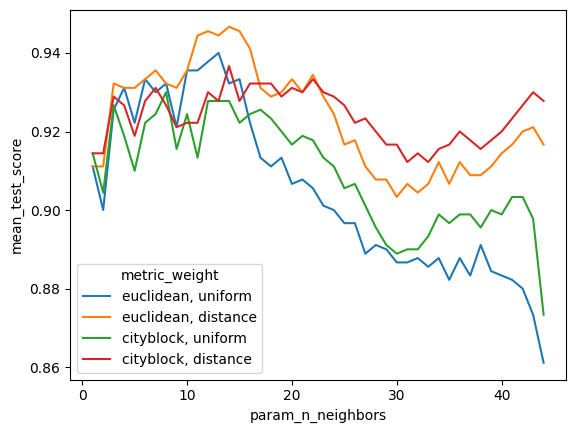

In [58]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [64]:
clf = GaussianNB()

In [65]:
%%time
clf.fit(X_train, y_train)

CPU times: user 3.12 ms, sys: 6 µs, total: 3.13 ms
Wall time: 2.95 ms


GaussianNB()

In [66]:
y_pred = clf.predict(X_test)
y_pred

array([2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2])

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [70]:
clf.predict_proba(X_test)

array([[0.        , 0.05911192, 0.94088808],
       [0.        , 0.0609678 , 0.9390322 ],
       [0.        , 0.12170308, 0.87829692],
       [0.        , 0.        , 1.        ],
       [0.        , 0.11949447, 0.88050553],
       [0.        , 0.11996101, 0.88003899],
       [0.        , 0.12053173, 0.87946827],
       [0.        , 0.06018035, 0.93981965],
       [0.        , 0.05839197, 0.94160803],
       [0.        , 0.05899035, 0.94100965],
       [0.        , 0.11849909, 0.88150091],
       [0.        , 0.05975322, 0.94024678],
       [0.        , 0.06134997, 0.93865003],
       [0.        , 0.06152405, 0.93847595],
       [0.        , 0.0596295 , 0.9403705 ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.06061271, 0.93938729],
       [0.        , 0.12160338, 0.87839662],
       [0.        , 0.05912235, 0.94087765],
       [0.        , 0.05944414, 0.94055586],
       [0.        , 0.0592674 , 0.9407326 ],
       [0.        , 0.11919282, 0.88080718],
       [0.

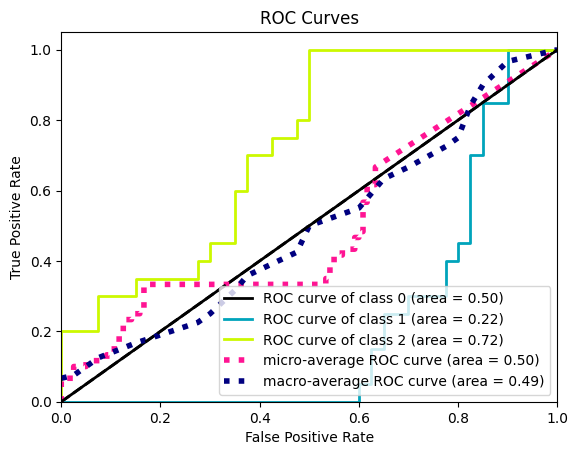

0.4808333333333333


In [71]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

### Wine dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [72]:
from sklearn.datasets import load_wine

d = load_wine(as_frame=True)
df_orig = d["data"]
y = np.array(d["target"])

df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [73]:
# adding a fake categorical variable to see how to deal with it
cat_variable_1_values = ["red", "blue", "green"]
df_orig["color"] = [
    cat_variable_1_values[np.random.randint(0, len(cat_variable_1_values))]
    for _ in range(len(df_orig))
]

# creating an ordinal variable
df_orig["alcalinity_of_ash_binned"] = pd.qcut(
    df_orig["alcalinity_of_ash"], q=4, labels=False
)

X_orig = df_orig.values
df_orig.head()

# one-hot encoding of categorical data
categorical_cols = ["color"]

df = pd.get_dummies(df_orig, columns=categorical_cols)
X = df.values
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_binned,color_blue,color_green,color_red
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,False,True,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,False,True,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,False,True,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,False,True,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,True,False,False


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

In [75]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 17) (54, 17) (124,) (54,)


Gaussian NB

In [76]:
clf = GaussianNB()

In [77]:
%%time
clf.fit(X_train, y_train)

CPU times: user 2.61 ms, sys: 59 µs, total: 2.67 ms
Wall time: 3.27 ms


GaussianNB()

In [79]:
y_pred = clf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.95      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



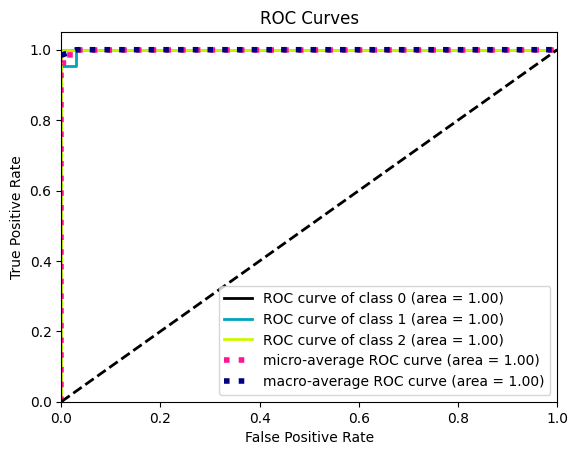

0.9995189995189996


In [81]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Categorical

In [82]:
non_cat_columns = [
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280/od315_of_diluted_wines",
    "proline",
]

X_noncat = df[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=random_state
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

(124, 13) (54, 13)


In [83]:
X_train_cat

array([[2, 3, 1, ..., 1, 1, 1],
       [3, 0, 3, ..., 3, 2, 3],
       [3, 0, 3, ..., 3, 1, 3],
       ...,
       [3, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 2, 2, 2],
       [1, 3, 2, ..., 3, 2, 0]])

In [84]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)

CategoricalNB()

In [85]:
X_train_cat

array([[2, 3, 1, ..., 1, 1, 1],
       [3, 0, 3, ..., 3, 2, 3],
       [3, 0, 3, ..., 3, 1, 3],
       ...,
       [3, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 2, 2, 2],
       [1, 3, 2, ..., 3, 2, 0]])

In [86]:
y_pred = clf.predict(X_test_cat)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Binary Classification Example

In [ ]:
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=random_state
)

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba

array([[1.00000000e+000, 9.60798304e-067],
       [3.28452382e-012, 1.00000000e+000],
       [1.00000000e+000, 1.37358518e-029],
       [9.07175634e-001, 9.28243663e-002],
       [1.00000000e+000, 1.13066573e-026],
       [4.86470493e-011, 1.00000000e+000],
       [1.00000000e+000, 1.85354720e-229],
       [1.00000000e+000, 2.24061507e-034],
       [1.00000000e+000, 7.64991022e-020],
       [1.00000000e+000, 5.98723466e-025],
       [1.55676568e-010, 1.00000000e+000],
       [4.87665583e-012, 1.00000000e+000],
       [2.51652415e-014, 1.00000000e+000],
       [3.35003877e-015, 1.00000000e+000],
       [1.00000000e+000, 7.27215795e-019],
       [1.00000000e+000, 5.01138848e-047],
       [1.00000000e+000, 3.84869046e-038],
       [5.11581566e-005, 9.99948842e-001],
       [1.00000000e+000, 5.99928618e-030],
       [1.00000000e+000, 8.93234543e-263],
       [9.23899517e-016, 1.00000000e+000],
       [1.22947094e-013, 1.00000000e+000],
       [4.60035794e-013, 1.00000000e+000],
       [1.0

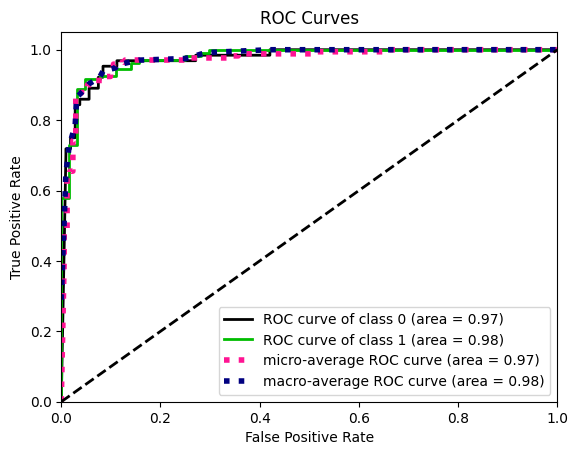

In [ ]:
plot_roc(y_test,y_test_pred_proba)
plt.show()

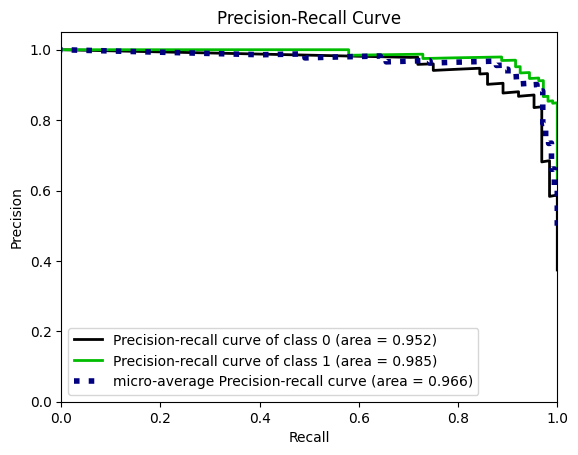

In [ ]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

For binary classification tasks you can also try to use cumulative gains curve and lift curve as implemented here

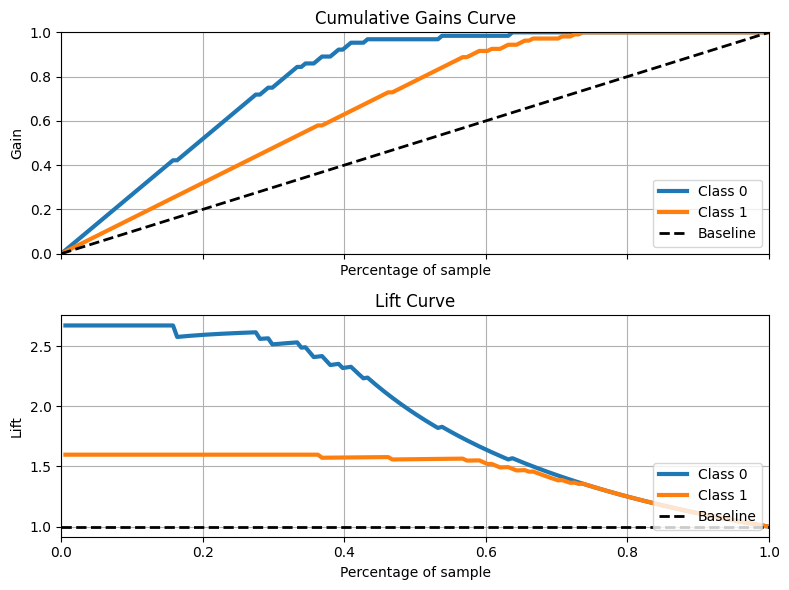

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
plot_cumulative_gain(y_test, y_test_pred_proba, ax=axs[0])
plot_lift_curve(y_test, y_test_pred_proba, ax=axs[1])
plt.tight_layout()
plt.show()